In [1]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import ticker
base_dir = "/content/drive/MyDrive/NetworkTrafficForecasting2505"

In [5]:
file_name = f"{base_dir}/Data/GEANT-OD_pair.csv"  # the input filename

In [6]:
df = pd.read_csv(file_name)

In [7]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d-%H-%M')  # Parse the time

In [8]:
data_columns = list(df.columns.values)
data_columns.remove('time')
data = df[data_columns].values
df[data_columns] = data

In [9]:
aggregated_time_series = np.sum(data, axis=1)
df_ts = pd.DataFrame()
df_ts['date'] = df['time']
df_ts['data'] = aggregated_time_series / 1000  # Plot in Mbps

In [10]:
# 計算第 1 百分位和第 99 百分位
lower = df_ts['data'].quantile(0.01)
upper = df_ts['data'].quantile(0.99)

# 找出異常值（低於 1% 或高於 99%）
outliers = (df_ts['data'] < lower) | (df_ts['data'] > upper)

# 將異常值設為 NaN
df_ts.loc[outliers, 'data'] = np.nan

# 確保索引是時間類型（插值會用到）
df_ts.index = pd.to_datetime(df_ts.index)

# 插值法補 NaN（依時間的線性插值）
df_ts['data'] = df_ts['data'].interpolate(method='time')

In [11]:
# add a datetimeindex
dates = pd.DatetimeIndex(df_ts['date'])
df_ts = df_ts.set_index(dates).resample('1H').mean()

In [12]:
df_ts = df_ts.drop(["date"], axis=1)

In [13]:
df_ts

,data
date,
2005-05-04 15:00:00,10611.016084
2005-05-04 16:00:00,10049.205971
2005-05-04 17:00:00,9372.500640
2005-05-04 18:00:00,9205.278249
2005-05-04 19:00:00,8672.903602
...,...
2005-08-31 03:00:00,6188.009931
2005-08-31 04:00:00,5885.357611
2005-08-31 05:00:00,6023.857567


<Axes: xlabel='date'>

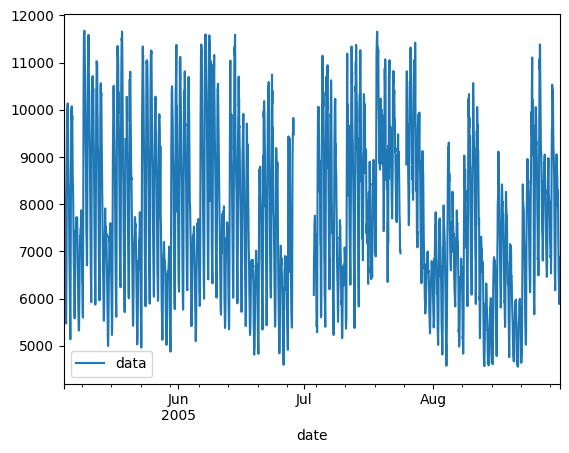

In [14]:
df_ts.plot()

In [ ]:
df_ts.to_csv(f"{base_dir}/Processed_Dataset/Abilene.csv")